In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

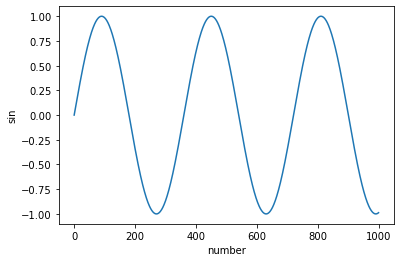

In [2]:
x = np.arange(0,1000)
y = np.sin(np.radians(x))
plt.xlabel('number')
plt.ylabel('sin')
plt.plot(x,y)

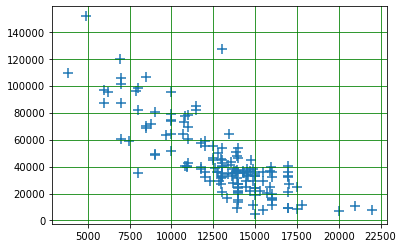

In [3]:
cars = pd.read_csv('Data/usedcars.csv')
plt.scatter(x = 'price',y = 'mileage',data = cars,marker = '+',s = 100)
plt.grid(c = 'green',axis = 'both',which = 'both')

In [4]:
cars1 = cars.model.value_counts(sort = False).to_frame(name = 'count').reset_index().rename(columns = {'index':'model'})
cars1

,model,count
0,SEL,23
1,SE,78
2,SES,49


<AxesSubplot:xlabel='model', ylabel='count'>

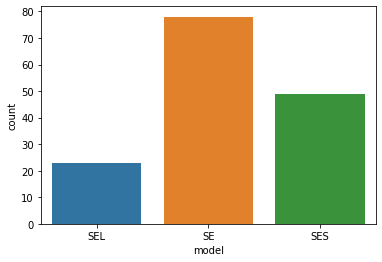

In [5]:
plt.figure(figsize = [6,4])
sns.countplot(x = 'model', data = cars)

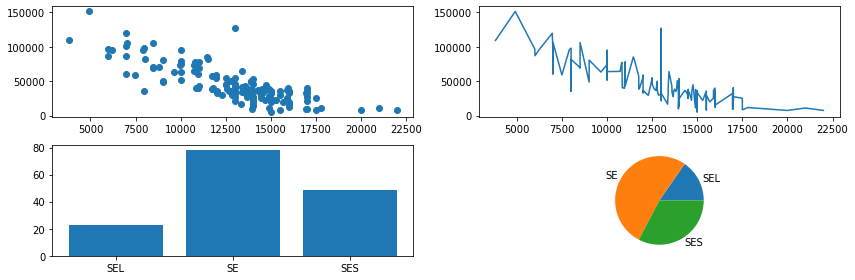

In [6]:
z,ax = plt.subplots(nrows=2,ncols=2,figsize=[12,4])
ax[0,0].scatter(x='price',y='mileage',data=cars)
ax[0,1].plot('price','mileage',data=cars)
ax[1,0].bar(x='model',height='count',data=cars1)
ax[1,1].pie(x='count',data=cars1,labels='model',radius=1)
plt.tight_layout()

In [7]:
cars.groupby('model').size()

model
SE     78
SEL    23
SES    49
dtype: int64

In [8]:
insurance = pd.read_csv('Data/insurance.csv')
insurance

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Variance Threshold

removes features that are below the variance threshold values

In [9]:
data = pd.DataFrame({'A':[1,2,4,1,2],'B':[4,5,6,7,8],'C':[0,0,0,0,0],'D':[1,1,1,1,1]})
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = 0) ### will remove 0 variance features
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [10]:
var_thres.get_support()

array([ True,  True, False, False])

In [11]:
constant_columns = [column for column in data.columns if column not in data.columns[var_thres.get_support()]]
print(constant_columns)

['C', 'D']


In [12]:
data.drop(constant_columns,axis = 1)

,A,B
0,1,4
1,2,5
2,4,6
3,1,7
4,2,8


In [13]:
data = pd.read_csv('Data/santander.csv',nrows=10000)
data

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.00,195.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20069,2,52,150.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27745.740000,1
9996,20070,2,23,90.0,51.06,51.06,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120468.090000,0
9997,20071,2,37,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,98462.880000,0
9998,20072,2,24,0.0,0.00,0.00,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102070.770000,0


In [14]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(labels = ['TARGET'],axis = 1),data['TARGET'],test_size=0.3,random_state=0)

In [24]:
from sklearn.feature_selection import VarianceThreshold
var_thres = VarianceThreshold(threshold = 0) ### will remove 0 variance features
var_thres.fit(X_train)

VarianceThreshold(threshold=0)

In [33]:
var_thres.get_support().shape

(370,)

In [26]:
len(X_train.columns[var_thres.get_support()])

284

In [28]:
sum(var_thres.get_support())  #constant features

284

In [31]:
constant_columns= [column for column in X_train.columns if column not in X_train.columns[var_thres.get_support()]]
len(constant_columns)    #non constant features

86

In [32]:
284+86

370